In [1]:
"""
Simple Model Predictive Control Simulation

author Atsushi Sakai
"""
import time
from cvxpy import *
import numpy as np
import matplotlib.pyplot as plt
print("Simulation start")

np.random.seed(1)
n = 4   # state size
m = 2   # input size
T = 50  # number of horizon

# simulation parameter
alpha = 0.2
beta  = 5.0

Simulation start


In [20]:
# Model Parameter
A   = np.eye(n) + alpha * np.random.randn(n, n)
B   = np.random.randn(n, m)
x_0 = beta * np.random.randn(n)

x = Variable((n, T + 1))
u = Variable((m, T))

cost   = 0
constr = []
# states = []
for t in range(T):
    cost   += sum_squares(x[:,t+1]) + sum_squares(u[:,t])
    constr += [x[:,t+1] == A@x[:,t] + B@u[:,t],
              norm(u[:,t], 'inf') <= 1]
    # states.append(Problem(Minimize(cost), constr))
# sums problem objectives and concatenates constraints.
# prob = sum(states)
# prob.constraints += [x[:,T] == 0, x[:,0] == x_0]
constr += [x[:,T] == 0, x[:,0] == x_0]
prob   = Problem(Minimize(cost), constr)

start  = time.time()
result = prob.solve(verbose=True)
elapsed_time = time.time() - start
print ("calc time:{0}".format(elapsed_time) + "[sec]")

-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 654, constraints m = 758
          nnz(P) + nnz(A) = 2758
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1   0.0000e+00   2.05e+00   2.05e+02   1.00e-01   7.05e-04s
 125   3.6940e+01   9.53e-06   3.42e-05   3.63e+00   3.21e-03s

status:               solved
solution polis

In [25]:
result

36.93951376431052

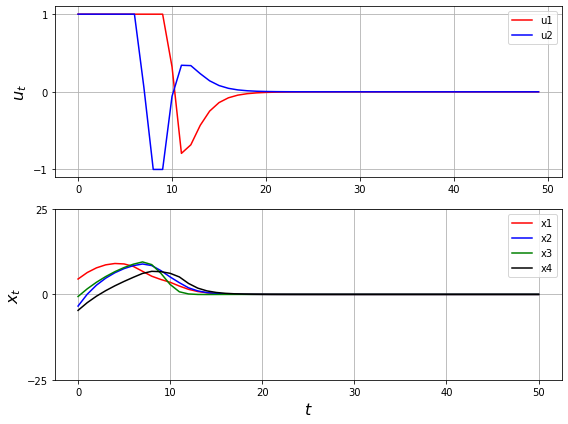

In [3]:
if result == float("inf"):
    print("Cannot optimize")
    import sys
    sys.exit()
    #  return

f = plt.figure(figsize=[8, 6])
# Plot (u_t)_1.
ax = f.add_subplot(211)
u1 = np.array(u[0,:].value).tolist()
u2 = np.array(u[1,:].value).tolist()
plt.plot(u1, '-r', label="u1")
plt.plot(u2, '-b', label="u2")
plt.ylabel(r"$u_t$", fontsize=16)
plt.yticks(np.linspace(-1.0, 1.0, 3))
plt.legend()
plt.grid(True)

# Plot (u_t)_2.
plt.subplot(2, 1, 2)
x1 = np.array(x[0,:].value).tolist()
x2 = np.array(x[1,:].value).tolist()
x3 = np.array(x[2,:].value).tolist()
x4 = np.array(x[3,:].value).tolist()
plt.plot(range(T+1), x1, '-r', label="x1")
plt.plot(range(T+1), x2, '-b', label="x2")
plt.plot(range(T+1), x3, '-g', label="x3")
plt.plot(range(T+1), x4, '-k', label="x4")
plt.yticks([-25, 0, 25])
plt.ylim([-25, 25])
plt.ylabel(r"$x_t$", fontsize=16)
plt.xlabel(r"$t$", fontsize=16)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
